# Описание проекта

Оператора сотовой связи предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.<br><br>
Необходимо выполнить предварительный анализ тарифов на небольшой выборке клиентов, проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание данных представлено для соответствующей таблицы:<br>
<a href='#calls'>Таблица calls</a><br>
<a href='#internet'>Таблица internet</a><br>
<a href='#messages'>Таблица messages</a><br>
<a href='#tariffs'>Таблица tariffs</a><br>
<a href='#users'>Таблица users</a><br><br>
Проект выполнен по следующим шагам:<br>
<a href='#step1'>Шаг 1. Загрузка файлов и изучение общей информации</a><br>
<a href='#step2'>Шаг 2. Подготовка данных</a><br>
<a href='#step3'>Шаг 3. Анализ данных</a><br>
<a href='#step4'>Шаг 4. Проверка гипотез</a><br>
<a href='#step5'>Шаг 5. Общий вывод</a><br>

<a id='step1'></a>
## Шаг 1. Загрузка файлов и изучение общей информации
<a href='#calls'>Таблица calls</a><br>
<a href='#internet'>Таблица internet</a><br>
<a href='#messages'>Таблица messages</a><br>
<a href='#tariffs'>Таблица tariffs</a><br>
<a href='#users'>Таблица users</a><br>
<a href='#conclusion1'>Вывод 1</a><br>

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from datetime import  date
from scipy import stats as st

#импорт необходимых библиотек

<a id='calls'></a>
<strong>Таблица calls (информация о звонках):</strong><br>
id — уникальный номер звонка<br>
call_date — дата звонка<br>
duration — длительность звонка в минутах<br>
user_id — идентификатор пользователя, сделавшего звонок<br><br>

In [2]:
calls = pd.read_csv('calls.csv')

In [3]:
display(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


Разделители опознаны корректно.

In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропущенных значений нет.<br>
В столбце call_date требуется изменение типа данных с object на date.<br>
В столбце duration требуется изменение типа данных с float на unt

In [5]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Минимальное значение продолжительности разговора - 0 минут.<br>
Требуется дополнительная проверка по количеству нулевых звонков.

<a id='internet'></a>
<strong>Таблица internet (информация об интернет-сессиях):</strong><br>
id — уникальный номер сессии<br>
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)<br>
session_date — дата интернет-сессии<br>
user_id — идентификатор пользователя<br><br>

In [6]:
internet = pd.read_csv('internet.csv')

In [7]:
display(internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


Разделители опознаны корректно.<br>
В таблице имеется столбец <strong>Unnamed: 0</strong>, который не отражён в описании данных.

In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Пропущенных значений нет.<br>
В столбце mb_used требуется изменение типа данных на int, т.к. точность после запятой не играет роли<br>
В столбце session_date требуется изменение типа данных с object на date.


In [9]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Минимальное значение объёма потраченного за сессию интернет-трафика - 0 мб.<br>
Требуется дополнительная проверка по количеству нулевых сессий.

<a id='messages'></a>
<strong>Таблица messages (информация о сообщениях):</strong><br>
id — уникальный номер сообщения<br>
message_date — дата сообщения<br>
user_id — идентификатор пользователя, отправившего сообщение<br><br>

In [10]:
messages = pd.read_csv('messages.csv')

In [11]:
display(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


Разделители опознаны корректно.<br>

In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Пропущенных значений нет.<br>
В столбце message_date требуется изменение типа данных с object на date.

<a id='tariffs'></a>
<strong>Таблица tariffs (информация о тарифах):</strong><br>
tariff_name — название тарифа<br>
rub_monthly_fee — ежемесячная абонентская плата в рублях<br>
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату<br>
messages_included — количество сообщений в месяц, включённых в абонентскую плату<br>
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)<br>
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)<br>
rub_per_message — стоимость отправки сообщения сверх тарифного пакета<br>
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)<br>

In [13]:
tariffs = pd.read_csv('tariffs.csv')

In [14]:
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Разделители опознаны корректно.

In [15]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Пропущенных значений нет.<br>
Изменений типов данных не требуется.

<a id='users'></a>
<strong>Таблица users (информация о пользователях):</strong><br>
user_id — уникальный идентификатор пользователя<br>
first_name — имя пользователя<br>
last_name — фамилия пользователя<br>
age — возраст пользователя (годы)<br>
reg_date — дата подключения тарифа (день, месяц, год)<br>
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)<br>
city — город проживания пользователя<br>
tariff — название тарифного плана<br><br>

In [16]:
users = pd.read_csv('users.csv')

In [17]:
display(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Разделители опознаны корректно.

In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Определены пропущенные значения в столбце churn_date, в значительном количестве. Пропуски означают, что пользователь по сей день пользуется тарифом<br>
В столбцах churn_date и reg_date требуется изменение типа данных с object на date.

In [19]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Данные о возрасте выгружены корректно<br>


Для проверки на корректность значений вывожу список уникальных значений по городам.<br>
Названия городов выгружены корректно.

<a id='conclusion1'></a>
### Вывод 1

В датафреймах представлена следующая информация:<br>
202607 строк с данными о разговорах пользователей;<br>
149396 строк с данными об интернет-сессиях пользователей;<br>
123036 строк с данным о сообщениях пользователей;<br>
2 тарифах;<br>
500 уникальных пользователях.
<br><br>
Требуется изменение данных в:
1. В таблице <strong>calls</strong> в столбце call_date требуется изменение типа данных с object на date, в столбце duration требуется изменение типа данных с float на int
2. В таблице <strong>internet</strong> в столбце mb_used требуется изменение типа данных на int, т.к. точность после запятой не играет роли, В столбце session_date требуется изменение типа данных с object на date.
3. В таблице <strong>messages</strong> в столбце message_date требуется изменение типа данных с object на date.
4. В таблице <strong>users</strong> в столбцах churn_date и reg_date требуется изменение типа данных с object на date.
<br><br>

В таблице <strong>internet</strong> имеется столбец <strong>Unnamed: 0</strong>, который не отражён в описании данных, значения дублируются с индексами и столбец может быть удалён.
<br><br>
Также требуется дополнительная проверка данных:
1. В таблице <strong>calls</strong> в столбце duration минимальное значение продолжительности разговора - 0 минут. Требуется подсчёт количества таких звонков и определение их доли.
2. В таблице <strong>internet</strong> в столбце mb_used инимальное значение объёма потраченного за сессию интернет-трафика - 0 минут. Требуется подсчёт количества таких сессий и определение их доли.
<br><br>

В талице <strong>users</strong> в столбце churn_date присутствуют пропуски, которые означают, что пользователь по сей день пользуется тарифом<br>


<a id='step2'></a>
## Шаг 2. Подготовка данных
<a href='#step21'>Приведение данных к нужным типам</a><br>
<a href='#step22'>Исправление ошибок в данных</a><br>
<a href='#step23'>Расчёт для каждого пользователя количества сделанных звонков и израсходованных минут разговора по месяцам</a><br>
<a href='#step24'>Расчёт для каждого пользователя количества отправленных сообщений по месяцам</a><br>
<a href='#step25'>Расчёт для каждого пользователя объема израсходованного интернет-трафика по месяцам</a><br>
<a href='#step26'>Расчёт для каждого пользователя помесячной выручки</a><br>
<a href='#conclusion2'>Вывод 2</a><br>

<a id='step21'></a>
### Приведите данные к нужным типам

<font color=grey>Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.</font>

In [20]:
calls['duration'] = np.ceil(calls.duration) #округляю вверх

In [21]:
internet['mb_used'] = np.ceil(internet.mb_used) #округляю вверх

В соответствиями с условиями тарифа округляю продолжительность звонков и количество использованных мегабайт.

In [22]:
internet['mb_used'] = internet['mb_used'].astype(int) #точность после запятой не требуется, меняю на целое

In [23]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d') #изменяю на формат date

In [24]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d') #изменяю на формат date

In [25]:
calls['duration'] = calls['duration'].astype(int) #точность после запятой не требуется, меняю на целое

In [26]:
messages['messages_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d') #изменяю на формат date

In [27]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d') #изменяю на формат date

In [28]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d') #изменяю на формат date

Все типы данных, ранее выявленные как некорректные, были заменены на требуемый формат.

<a id='step22'></a>
### Исправление ошибок в данных

<font color=grey>Поясните, какие ошибки вы нашли и как их исправили. Обратите внимание, что у большого количества звонков длительность — 0.0 минут. Это проблема в данных, нужна предобработка.</font>

In [29]:
sorted(users['city'].unique()) #вывожу список уникальных значений по городам

['Архангельск',
 'Астрахань',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Волжский',
 'Вологда',
 'Воронеж',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Магнитогорск',
 'Махачкала',
 'Москва',
 'Мурманск',
 'Набережные Челны',
 'Нижневартовск',
 'Нижний Новгород',
 'Нижний Тагил',
 'Новокузнецк',
 'Новороссийск',
 'Новосибирск',
 'Омск',
 'Оренбург',
 'Орёл',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Стерлитамак',
 'Сургут',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Тюмень',
 'Улан-Удэ',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Химки',
 'Чебоксары',
 'Челябинск',
 'Череповец',
 'Чита',
 'Якутск',
 'Ярославль']

In [30]:
del internet['Unnamed: 0'] #удаляю столбец, не представляющий ценности

In [31]:
print('Общее количество строк в фрейме calls:',len(calls))
print('Количество строк, с нулевой продолжительностью разговора:',len(calls.query('duration == 0')))
print('Доля: {:.1%}'.format(len(calls.query('duration == 0'))/len(calls)))

Общее количество строк в фрейме calls: 202607
Количество строк, с нулевой продолжительностью разговора: 39613
Доля: 19.6%


In [32]:
print('Общее количество строк в фрейме calls:',len(internet))
print('Количество строк, с нулевым объемом сессий:',len(internet.query('mb_used == 0')))
print('Доля: {:.1%}'.format(len(internet.query('mb_used == 0'))/len(internet)))

Общее количество строк в фрейме calls: 149396
Количество строк, с нулевым объемом сессий: 19598
Доля: 13.1%


Объем нулевых данных в обоих таблицах занимает значимую долю (более 10%). Принимаю решения не заменять эти данные, чтобы не анализировать данные, построенные на собственной гипотезе. При анализе, включающем в себя столбец calls['duration'] и internet['mb_used'] принимаю решение применять сортировку >0, для чего создаю две соответствующие таблицы calls_clear и internet_clear.

In [33]:
calls_clear = calls.query('duration > 0').copy() #создаю таблицу с ненулевыми данными по продолжительности звонков

In [34]:
internet_clear = internet.query('mb_used > 0').copy() #создаю таблицу с ненулевыми данными по интернет сессиям

Датафреймы созданы.

In [35]:
print(users['reg_date'].min()) #рассчитываю минимальную дату регистрации

2018-01-01 00:00:00


Все абоненты были подключены в текущем году (или ранее, но в таблице фигурируют как зарегистрированные 2018-01-01 00:00:00), соответствено можно применять разделение по месяцам.

In [36]:
start_finish = users[['user_id', 'reg_date', 'churn_date']].copy()

Создаю таблицу, в которой будут храниться только данные о дате подключения пользователя и дате прекращения пользования тарифом.

In [37]:
start_finish['reg_date'] = start_finish['reg_date'].dt.month

In [38]:
start_finish['churn_date'] = start_finish['churn_date'].dt.month

Изменяю дату на формате месяца регистрациии

In [39]:
start_finish['churn_date'] = start_finish['churn_date'].fillna(12)

Если пользователь не прекращал использование тарифа - присваиваю значение 12го месяца для дальнейшей обработки.

In [40]:
start_finish['churn_date'] = start_finish['churn_date'].astype(int) #привожу столбец к типу целое

In [41]:
display(start_finish)
start_finish.info()

,user_id,reg_date,churn_date
0,1000,5,12
1,1001,11,12
2,1002,6,12
3,1003,8,12
4,1004,5,12
...,...,...,...
495,1495,8,12
496,1496,1,12
497,1497,10,12
498,1498,7,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user_id     500 non-null    int64
 1   reg_date    500 non-null    int64
 2   churn_date  500 non-null    int32
dtypes: int32(1), int64(2)
memory usage: 9.9 KB


Формирую таблицу, которая будет использоваться далее.

In [42]:
start_finish['month'] = start_finish['reg_date']
display(start_finish)

,user_id,reg_date,churn_date,month
0,1000,5,12,5
1,1001,11,12,11
2,1002,6,12,6
3,1003,8,12,8
4,1004,5,12,5
...,...,...,...,...
495,1495,8,12,8
496,1496,1,12,1
497,1497,10,12,10
498,1498,7,10,7


<a id='step23'></a>
### Расчёт для каждого пользователя количества сделанных звонков и израсходованных минут разговора по месяцам

In [43]:
print(calls_clear['call_date'].min()) #рассчитываю минимальную дату
print(calls_clear['call_date'].max()) #рассчитываю максимальную дату

2018-01-01 00:00:00
2018-12-31 00:00:00


Проверяю, что данные в таблице ограничены одним годом.

In [44]:
calls_clear['month'] = calls_clear['call_date'].dt.month

Для расчёта по месяцам добавляю в таблицу столбец c обозначением месяца.

Расчёты произвожу по таблице calls_clear, т.к. если считать по исходной таблице calls с большим количеством нулевых звонков измениться значение среднего.

In [45]:
calls_sum = calls_clear.groupby(['user_id','month'])['duration'].sum().reset_index() #группирую данные
display(calls_sum)

,user_id,month,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
...,...,...,...
3163,1498,10,247
3164,1499,9,70
3165,1499,10,449
3166,1499,11,612


Формирую таблицу с количеством израсходованных минут пользователями по месяцам.

In [46]:
calls_count = calls_clear.groupby(['user_id','month'])['duration'].count().reset_index() #группирую данные
calls_count.rename(columns={'duration': 'calls'}, inplace=True) #переименовываю столбец
display(calls_count)

,user_id,month,calls
0,1000,5,17
1,1000,6,28
2,1000,7,41
3,1000,8,42
4,1000,9,46
...,...,...,...
3163,1498,10,30
3164,1499,9,8
3165,1499,10,44
3166,1499,11,62


Формирую таблицу с количеством звонков пользователями по месяцам.

<a id='step24'></a>
### Расчёт для каждого пользователя количества отправленных сообщений по месяцам

In [47]:
print(messages['messages_date'].min()) #рассчитываю минимальную дату
print(messages['messages_date'].max()) #рассчитываю максимальную дату

2018-01-01 00:00:00
2018-12-31 00:00:00


Проверяю, что данные в таблице ограничены одним годом.

In [48]:
messages['month'] = messages['messages_date'].dt.month

Для расчёта по месяцам добавляю в таблицу столбец c обозначением месяца.

In [49]:
messages_count = messages.groupby(['user_id','month'])['id'].count().reset_index() #группирую данные
messages_count.rename(columns={'id': 'messages'}, inplace=True) #переименовываю столбец
display(messages_count)

,user_id,month,messages
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,53
4,1000,9,59
...,...,...,...
3736,1499,8,24
3737,1499,9,20
3738,1499,10,35
3739,1499,11,37


Формирую таблицу с количеством сообщений пользователями по месяцам.

<a id='step25'></a>
### Расчёт для каждого пользователя объема израсходованного интернет-трафика по месяцам

In [50]:
print(internet['session_date'].min()) #рассчитываю минимальную дату
print(internet['session_date'].min()) #рассчитываю максимальную дату

2018-01-01 00:00:00
2018-01-01 00:00:00


Проверяю, что данные в таблице ограничены одним годом.

In [51]:
internet_clear['month'] = internet_clear['session_date'].dt.month

Для расчёта по месяцам добавляю в таблицу столбец c обозначением месяца.

In [52]:
internet_sum = internet_clear.groupby(['user_id','month'])['mb_used'].sum().reset_index() #группирую данные
display(internet_sum)

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581
...,...,...,...
3196,1498,10,20604
3197,1499,9,1848
3198,1499,10,17809
3199,1499,11,17984


Формирую таблицу с объемом израсходованного траффика пользователями по месяцам.

<a id='step26'></a>
### Расчёт для каждого пользователя помесячной выручки

Для расчёта помесячной выручки с каждого пользователя требуется провести ряд действий.<br>
Начинаю формировать объединенную таблицу.

In [53]:
total = calls_sum.merge(calls_count, on=['user_id', 'month'])
#не применяю параметр how, т.к. количество строк одинаковое, данные аналогичны

На первом этапе объединяю таблицы <strong>calls_sum</strong> и <strong>calls_count</strong> по столбцам 'user_id' и 'month'.

In [54]:
total = total.merge(messages_count, on=['user_id', 'month'], how='outer')
#применяю параметр how='outer', чтобы в таблицу попали пользователи с нулевыми значениями звонков и сообщений

На втором этапе объединяю таблицу <strong>total</strong> и <strong>messages_count</strong> по столбцам 'user_id' и 'month'.<br>
В таблицу попадают пользователи с нулевыми значениями сообщений (не попавшие в таблицу <strong>messages_count</strong>), а также остаются пользователи с нулевыми значениями звонков (которых не было в таблицах <strong>calls_xxx</strong>).

In [55]:
total = total.merge(internet_sum, on=['user_id', 'month'], how='outer')
#применяю параметр how='outer', чтобы в таблицу попали пользователи с нулевыми значениями сессий интернета

На третьем этапе объединяю таблицу <strong>total</strong> и <strong>internet_sum</strong> по столбцам 'user_id' и 'month'.<br>
В таблицу попадают пользователи с нулевыми значениями сессий интернета (не отраженные в таблице <strong>internet_sum</strong>), а также остаются пользователи с ранее полученными нулевыми значениями.

Исходя из дальнейшего задания мне понадобятся только следующие данные из таблицы <strong>users</strong>:
1. user_id — уникальный идентификатор пользователя
2. city — город проживания пользователя
3. tariff — название тарифного плана
<br><br>

In [56]:
users_short = users[['user_id', 'city', 'tariff']].copy()

Строю новую таблицу на основе датафрейма <strong>users</strong>

In [57]:
total = total.merge(users_short, on='user_id', how='left')
#применяю параметр how='left', чтобы в таблицу попали толькосоответствующие значения из users

На четвертом этапе объединяю таблицу <strong>total</strong> и <strong>users_short</strong> по столбцу 'user_id'<br>
Таким образом получаю общую таблицу с необходимыми мне для дальнейших расчётов данными о пользователях.

In [58]:
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True) #переименовываю столбец для корректной работы merge()

In [59]:
total = total.merge(tariffs, on='tariff', how='left')
#применяю параметр how='left', чтобы в таблицу попали только соответствующие значения из tariff

На пятом этапе объединяю таблицу <strong>total</strong> и <strong>tariffs</strong> по столбцу 'tariff'<br>
Таким образом получаю общую таблицу с необходимыми мне для дальнейших расчётов данными о тарифах.

In [60]:
total = total.fillna(0) #заполняю все пропущенные значения в таблице нолём

In [61]:
def over_duration(row):
    """
    заполняю в таблице столбец с
    количеством минут, которые пользователь
    потратил сверх тарифного плана
    """
    data_included=row['minutes_included']
    result=row['duration']
    summ = result - data_included
    if summ > 0:
        return summ
    return 0

total['over_duration']=total.apply(over_duration, axis = 1)

Вычисляю количество минут, потраченные пользователем сверх тарифного плана.<br>
Если пользователь потратил меньше минут, чем предусмотрено тарифом, то заполняю строку нулевым значением.

In [62]:
total['messages'] = total['messages'].astype(int) #привожу к целым значениям

def over_messages(row):
    """
    заполняю в таблице столбец с
    количеством сообщений, которые пользователь
    потратил сверх тарифного плана
    """
    data_included=row['messages_included']
    result=row['messages']
    summ = result - data_included
    if summ > 0:
        return summ
    return 0

total['over_messages']=total.apply(over_messages, axis = 1)

Вычисляю количество сообщений, потраченные пользователем сверх тарифного плана.<br>
Если пользователь потратил меньше сообщений, чем предусмотрено тарифом, то заполняю строку нулевым значением.

In [63]:
total['mb_used'] = total['mb_used'].astype(int) #привожу к целым значениям

def over_mb(row):
    """
    заполняю в таблице столбец с
    количеством мегабайт, которые пользователь
    потратил сверх тарифного плана
    """
    data_included=row['mb_per_month_included']
    result=row['mb_used']
    summ = result - data_included
    if summ > 0:
        return summ
    return 0

total['over_mb_used']=total.apply(over_mb, axis = 1)

Вычисляю количество мегабайт, потраченные пользователем сверх тарифного плана.<br>
Если пользователь потратил меньше мегабайт, чем предусмотрено тарифом, то заполняю строку нулевым значением.

In [64]:
total['over_gb_used'] = np.ceil(total['over_mb_used']/1024) #перевожу потраченный траффик в ГБ и округляю вверх

In [65]:
display(total)

,user_id,month,duration,calls,messages,mb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_duration,over_messages,over_mb_used,over_gb_used
0,1000,5,159.0,17.0,22,2256,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0,0,0.0
1,1000,6,172.0,28.0,43,23257,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0,0,0.0
2,1000,7,340.0,41.0,47,14016,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0,0,0.0
3,1000,8,408.0,42.0,53,14070,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0,0,0.0
4,1000,9,466.0,46.0,59,14581,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,1499,7,0.0,0.0,25,0,Пермь,smart,50,15360,500,550,200,3,3,0.0,0,0,0.0
4532,1499,8,0.0,0.0,24,0,Пермь,smart,50,15360,500,550,200,3,3,0.0,0,0,0.0
4533,1240,2,0.0,0.0,0,961,Воронеж,ultra,1000,30720,3000,1950,150,1,1,0.0,0,0,0.0
4534,1373,1,0.0,0.0,0,9184,Улан-Удэ,smart,50,15360,500,550,200,3,3,0.0,0,0,0.0


In [66]:
total['proceeds'] = total['rub_monthly_fee'] + ( #плата за месяц
    total['over_duration']*total['rub_per_minute']) + ( #сверх лимита по минутам
    total['over_messages']*total['rub_per_message']) + ( #сверх лимита по сообщениям
    total['over_gb_used']*total['rub_per_gb']) #сверх лимита по трафику

In [67]:
display(total) #просмтриваю получившуюся таблицу

,user_id,month,duration,calls,messages,mb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_duration,over_messages,over_mb_used,over_gb_used,proceeds
0,1000,5,159.0,17.0,22,2256,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0,0,0.0,1950.0
1,1000,6,172.0,28.0,43,23257,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0,0,0.0,1950.0
2,1000,7,340.0,41.0,47,14016,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0,0,0.0,1950.0
3,1000,8,408.0,42.0,53,14070,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0,0,0.0,1950.0
4,1000,9,466.0,46.0,59,14581,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0,0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,1499,7,0.0,0.0,25,0,Пермь,smart,50,15360,500,550,200,3,3,0.0,0,0,0.0,550.0
4532,1499,8,0.0,0.0,24,0,Пермь,smart,50,15360,500,550,200,3,3,0.0,0,0,0.0,550.0
4533,1240,2,0.0,0.0,0,961,Воронеж,ultra,1000,30720,3000,1950,150,1,1,0.0,0,0,0.0,1950.0
4534,1373,1,0.0,0.0,0,9184,Улан-Удэ,smart,50,15360,500,550,200,3,3,0.0,0,0,0.0,550.0


In [68]:
proceeds = total[['user_id', 'month', 'proceeds']]
display(proceeds)

,user_id,month,proceeds
0,1000,5,1950.0
1,1000,6,1950.0
2,1000,7,1950.0
3,1000,8,1950.0
4,1000,9,1950.0
...,...,...,...
4531,1499,7,550.0
4532,1499,8,550.0
4533,1240,2,1950.0
4534,1373,1,550.0


Формирую сокращенную таблицу <strong>proceeds</strong> с данными о выручке с каждого пользователя по месяцам.

<a id='conclusion2'></a>
### Вывод 2


В таблицах <strong>calls</strong> и <strong>internet</strong> столбцы 'duration' и 'mb_used' были округлены до целого значения в большую сторону.
<br><br>
Данные были приведены к необходимым типам, описанным в <a href='#conclusion1'>Вывод 1</a>.<br>
Были проверены уникальные значения имён городов в таблице <strong>users</strong>, корректировка не требуется.<br>
В таблицах <strong>calls</strong> и <strong>internet</strong> были отсечены нулевые данные (звонки, сессии), которые составляли <strong>19.6%</strong> и <strong>13.2%</strong> соответстветственно.
<br><br>
Также я выяснил, что все данные датированы 2018 годом.<br>
Пропущенные значения в столбце 'churn_date' (дата прекращения пользования тарифом также были заменены на значение 12), а при расчётах заданий использовалось значение текущего месяца (от 1 до 12).<br>
<br>
Далее я сформировал 5 таблиц:<br>
с количеством израсходованных минут пользователями по месяцам;<br>
с количеством звонков пользователями по месяцам;<br>
с количеством сообщений пользователями по месяцам;<br>
с объемом израсходованного траффика пользователями по месяцам;<br>
с данными о выручке с каждого пользователя по месяцам.<br>
<br>
Кроме того, в ходе вычислений была сформирована таблица <strong>total</strong>, на основе которой будут производиться дальнейшие расчёты.


<a id='step3'></a>
## Шаг 3. Анализ данных
<a href='#step31'>Сколько минут разговора требуется пользователям каждого тарифа в месяц?</a><br>
<a href='#step32'>Сколько сообщений требуется пользователям каждого тарифа в месяц?</a><br>
<a href='#step33'>Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?</a><br>
<a href='#conclusion3'>Вывод 3</a><br>

<a id='step31'></a>
### Сколько минут разговора требуется пользователям каждого тарифа в месяц?

In [69]:
total_duration_smart = total.query('tariff == "smart"')['duration']
total_duration_ultra = total.query('tariff == "ultra"')['duration']

In [70]:
print('Среднее для тарифа Ультра: {:.2f}'.format(total_duration_ultra.mean()))
print('Медиана для тарифа Ультра: {:.2f}'.format(total_duration_ultra.median()))
variance = np.var(total_duration_ultra)
print('Дисперсия для тарифа Ультра: {:.0f}'.format(variance))
standard_deviation = np.std(total_duration_ultra)
print('Стандартное отклонение для тарифа Ультра: {:.2f}'.format(standard_deviation))

print('_________________________________________________')

print('Среднее для тарифа Смарт: {:.2f}'.format(total_duration_smart.mean()))
variance = np.var(total_duration_smart)
print('Медиана для тарифа Смарт: {:.2f}'.format(total_duration_smart.median()))
print('Дисперсия для тарифа Смарт: {:.0f}'.format(variance))
standard_deviation = np.std(total_duration_smart)
print ('Стандартное отклонение для тарифа Смарт: {:.2f}'.format(standard_deviation))



Среднее для тарифа Ультра: 375.61
Медиана для тарифа Ультра: 332.00
Дисперсия для тарифа Ультра: 128596
Стандартное отклонение для тарифа Ультра: 358.60
_________________________________________________
Среднее для тарифа Смарт: 295.27
Медиана для тарифа Смарт: 310.00
Дисперсия для тарифа Смарт: 61797
Стандартное отклонение для тарифа Смарт: 248.59


Среднее и медианное значение израсходованных минут по тарифу Ультра выше, чем по тарифу Смарт.<br>
Это означает, что пользователи тарифа Ультра тратят на 10-30% больше минут.<br>

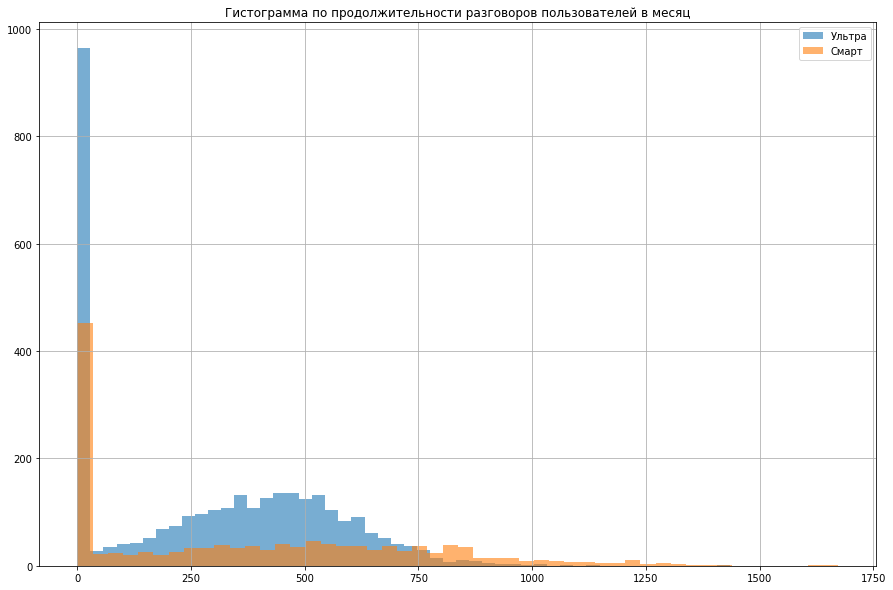

In [71]:
total_duration_smart.hist(bins=50, alpha = 0.6)
total_duration_ultra.hist(bins=50, alpha = 0.6, figsize=(15, 10))
plt.title('Гистограмма по продолжительности разговоров пользователей в месяц')
plt.legend(["Ультра", "Смарт"]);

На гистограмме есть выбросы в околонулевых значениях, которые могут объясняться большим количеством пользователей, которые используют другие тарифные опции (сообщения, интернет)<br>
В тарифе Ультра большее количество пользователей, тратящих от 100 до 600 минут в месяц, а тарифе Смарт более "плоское" распределение в зоне до 900 минут в месяц.<br>
Диаграмма скошена вправо.<br>
Тип распределение - нормальное распределение.

In [72]:
def limits (array_in):
    """
    функция для расчёта верхней и нижней границы
    нормального размаха
    """
    upper_quartile = np.percentile(array_in, 75)
    lower_quartile = np.percentile(array_in, 25)
    iqr = upper_quartile - lower_quartile
    
    upper_whisker = array_in[array_in<=(upper_quartile+1.5*iqr)].max()
    lower_whisker = array_in[array_in>=(lower_quartile-1.5*iqr)].min()
    return print('Нижняя граница нормального размаха массива:', lower_whisker,
                 '\nВерхняя граница нормального размаха массива:', upper_whisker)

In [73]:
print('Для тарифа Смарт:')
limits(total_duration_smart) #вычисляю границы нормального размаха

Для тарифа Смарт:
Нижняя граница нормального размаха массива: 0.0 
Верхняя граница нормального размаха массива: 1144.0


In [74]:
print('Для тарифа Ультра:')
limits(total_duration_ultra) #вычисляю границы нормального размаха

Для тарифа Ультра:
Нижняя граница нормального размаха массива: 0.0 
Верхняя граница нормального размаха массива: 1410.0


In [75]:
total_duration_smart = total_duration_smart[total_duration_smart>=7]
#удаляю выбросы в массиве данных по тарифу смарт по нижней границе
total_duration_smart = total_duration_smart[total_duration_smart<=1000]
#удаляю выбросы в массиве данных по тарифу смарт по верхней границе
total_duration_ultra = total_duration_ultra[total_duration_ultra>=5] 
#удаляю выбросы в массиве данных по тарифу ультра по нижней границе
total_duration_ultra = total_duration_ultra[total_duration_ultra<=1000]
#удаляю выбросы в массиве данных по тарифу смарт по верхней границе

Рассчитав границы нормальных размахов для массивов по обоим тарифам удаляю выбросы.<br>
Т.к. границы нормальных размахов отличались, принимаю для обоих тарифов одинаковые значения, повысив нижнию границу согласно диаграмме:<br>
Нижняя граница: <strong>7</strong><br>
Верхняя граница: <strong>1000</strong><br>

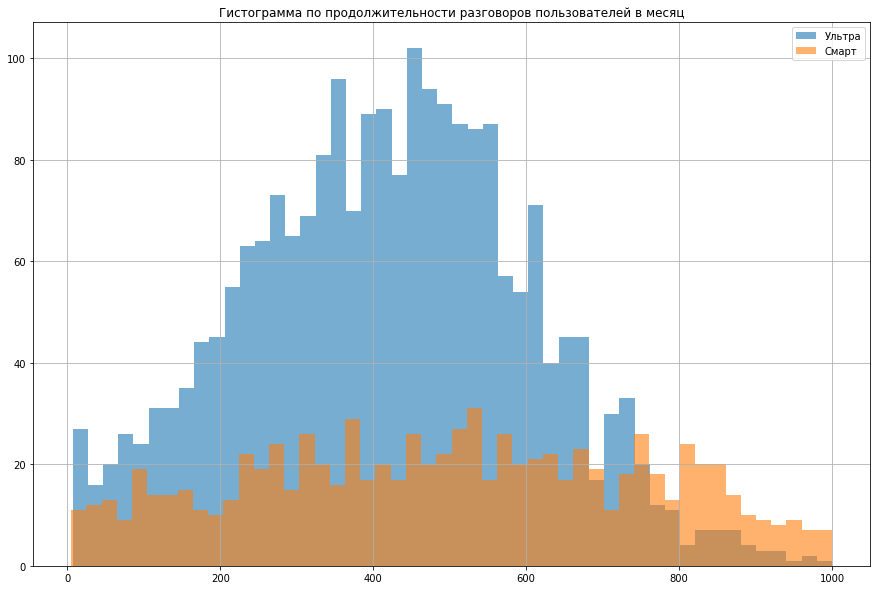

In [76]:
total_duration_smart.hist(bins=50, alpha = 0.6)
total_duration_ultra.hist(bins=50, alpha = 0.6, figsize=(15, 10))
plt.title('Гистограмма по продолжительности разговоров пользователей в месяц')
plt.legend(["Ультра", "Смарт"]);

Для проверки вывожу на экран диаграммы по продолжительности разговоров без выбросов.<br>
Диаграмма принимает вид, характерный для нормального распределения.

<a id='step32'></a>
### Сколько сообщений требуется пользователям каждого тарифа в месяц?

<font color=grey>Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.</font>

In [77]:
total_messages_smart = total.query('tariff == "smart"')['messages']
total_messages_ultra = total.query('tariff == "ultra"')['messages']

In [78]:
print('Среднее для тарифа Ультра: {:.2f}'.format(total_messages_ultra.mean()))
print('Медиана для тарифа Ультра: {:.2f}'.format(total_messages_ultra.median()))
variance = np.var(total_messages_ultra)
print('Дисперсия для тарифа Ультра: {:.0f}'.format(variance))
standard_deviation = np.std(total_messages_ultra)
print ('Стандартное отклонение для тарифа Ультра: {:.2f}'.format(standard_deviation))

print('_________________________________________________')

print('Среднее для тарифа Смарт: {:.2f}'.format(total_messages_smart.mean()))
print('Медиана для тарифа Смарт: {:.2f}'.format(total_messages_smart.median()))
variance = np.var(total_messages_smart)
print('Дисперсия для тарифа Смарт: {:.0f}'.format(variance))
standard_deviation = np.std(total_messages_smart)
print ('Стандартное отклонение для тарифа Смарт: {:.2f}'.format(standard_deviation))

Среднее для тарифа Ультра: 35.21
Медиана для тарифа Ультра: 20.00
Дисперсия для тарифа Ультра: 2018
Стандартное отклонение для тарифа Ультра: 44.92
_________________________________________________
Среднее для тарифа Смарт: 23.59
Медиана для тарифа Смарт: 13.00
Дисперсия для тарифа Смарт: 935
Стандартное отклонение для тарифа Смарт: 30.58


Среднее и медианное значение отправленных сообщений по тарифу Ультра выше, чем по тарифу Смарт.<br>
Это означает, что пользователи тарифа Ультра отправляют на 50% больше сообщений.<br>

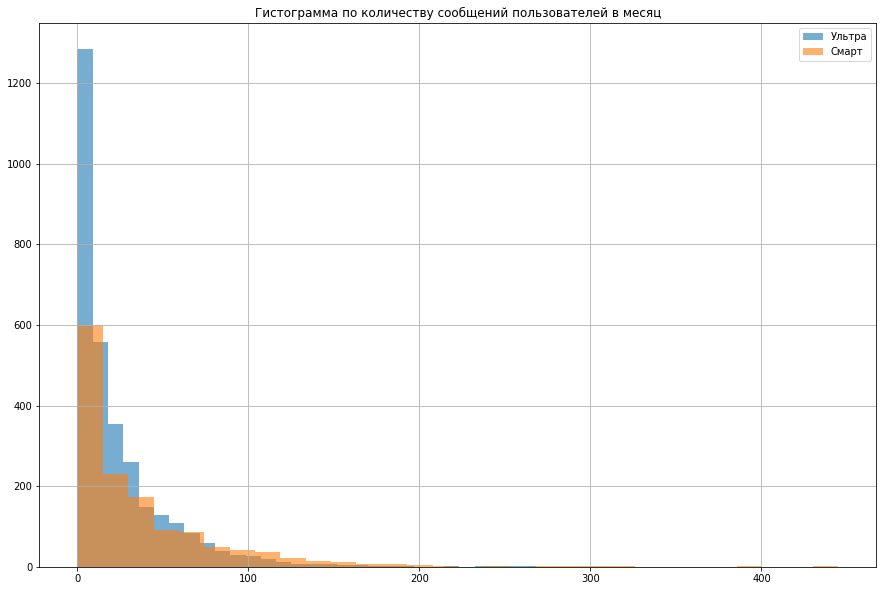

In [79]:
total_messages_smart.hist(bins=30, alpha = 0.6)
total_messages_ultra.hist(bins=30, alpha = 0.6, figsize=(15, 10))
plt.title('Гистограмма по количеству сообщений пользователей в месяц')
plt.legend(["Ультра", "Смарт"]);

На гистограмме есть выбросы в околонулевых значениях, которые могут объясняться большим количеством пользователей, которые используют другие тарифные опции (звонки, интернет)<br>
В тарифе Ультра большее количество пользователей, тратящих до 80 сообщений в месяц, а тарифе Смарт больше пользователей, тратящих более 100 сообщений в месяц.<br>
Диаграмма скошена вправо.<br>
Тип распределение - распределение Пуассона.

In [80]:
print('Для тарифа Смарт:')
limits(total_messages_smart) #вычисляю границы нормального размаха

Для тарифа Смарт:
Нижняя граница нормального размаха массива: 0 
Верхняя граница нормального размаха массива: 75


In [81]:
print('Для тарифа Ультра:')
limits(total_messages_ultra) #вычисляю границы нормального размаха

Для тарифа Ультра:
Нижняя граница нормального размаха массива: 0 
Верхняя граница нормального размаха массива: 115


In [82]:
total_messages_smart = total_messages_smart[total_messages_smart<=100]
#удаляю выбросы в массиве данных по тарифу смарт по верхней границе
total_messages_ultra = total_messages_ultra[total_messages_ultra<=100]
#удаляю выбросы в массиве данных по тарифу смарт по верхней границе

Рассчитав границы нормальных размахов для массивов по обоим тарифам удаляю выбросы.<br>
Т.к. в обоих массивах распредление Пуассона, то удаляю только верхние выбросы, придав им одинаковые значения:
Верхняя граница: <strong>100</strong><br>

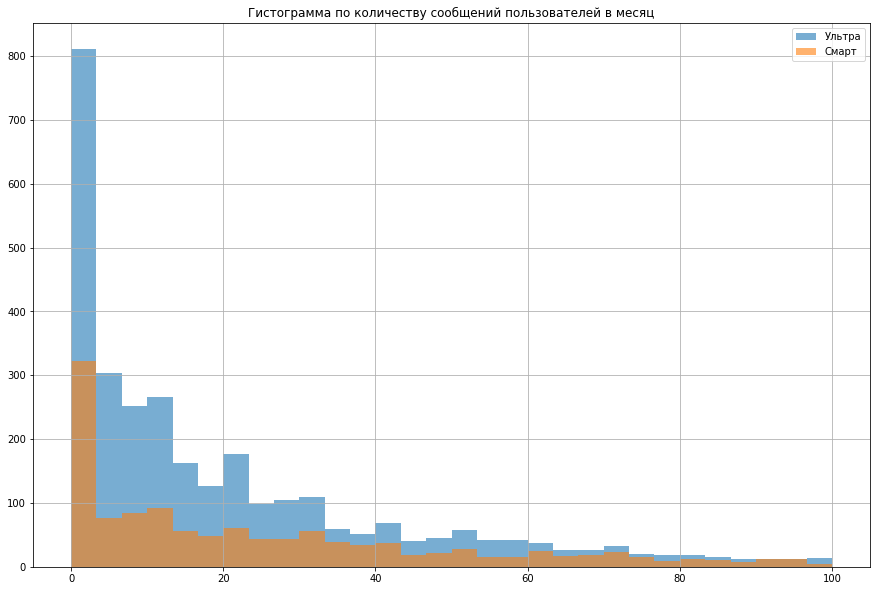

In [83]:
total_messages_smart.hist(bins=30, alpha = 0.6)
total_messages_ultra.hist(bins=30, alpha = 0.6, figsize=(15, 10))
plt.title('Гистограмма по количеству сообщений пользователей в месяц')
plt.legend(["Ультра", "Смарт"]);

Для проверки вывожу на экран диаграммы по количеству сообщений без выбросов.

<a id='step33'></a>
### Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

<font color=grey>Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.</font>

In [84]:
total_mb_smart = total.query('tariff == "smart"')['mb_used']
total_mb_ultra = total.query('tariff == "ultra"')['mb_used']

In [85]:
print('Среднее для тарифа Ультра: {:.2f}'.format(total_mb_ultra.mean()))
print('Медиана для тарифа Ультра: {:.2f}'.format(total_mb_ultra.median()))
variance = np.var(total_mb_ultra)
print('Дисперсия для тарифа Ультра: {:.0f}'.format(variance))
standard_deviation = np.std(total_mb_ultra)
print ('Стандартное отклонение для тарифа Ультра: {:.2f}'.format(standard_deviation))

print('_________________________________________________')

print('Среднее для тарифа Смарт: {:.2f}'.format(total_mb_smart.mean()))
print('Медиана для тарифа Смарт: {:.2f}'.format(total_mb_smart.median()))
variance = np.var(total_mb_smart)
print('Дисперсия для тарифа Смарт: {:.0f}'.format(variance))
standard_deviation = np.std(total_mb_smart)
print ('Стандартное отклонение для тарифа Смарт: {:.2f}'.format(standard_deviation))

Среднее для тарифа Ультра: 13899.06
Медиана для тарифа Ультра: 13861.00
Дисперсия для тарифа Ультра: 150297666
Стандартное отклонение для тарифа Ультра: 12259.59
_________________________________________________
Среднее для тарифа Смарт: 11465.88
Медиана для тарифа Смарт: 13495.00
Дисперсия для тарифа Смарт: 79011157
Стандартное отклонение для тарифа Смарт: 8888.82


Среднее и медианное значение трафика по тарифу Ультра выше, чем по тарифу Смарт.
Это означает, что пользователи тарифа Ультра тратят на 3%-20% больше трафика.

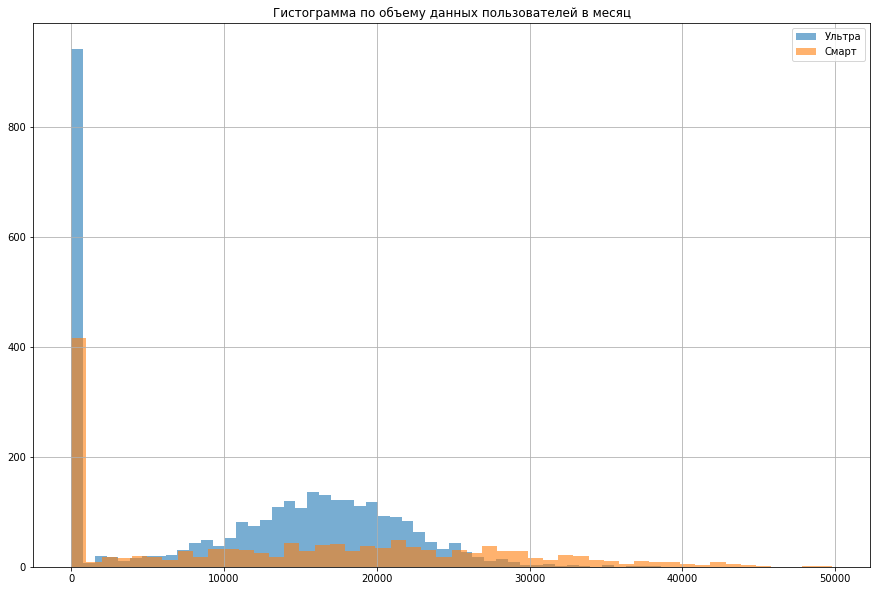

In [86]:
total_mb_smart.hist(bins=50, alpha = 0.6)
total_mb_ultra.hist(bins=50, alpha = 0.6, figsize=(15, 10))
plt.title('Гистограмма по объему данных пользователей в месяц')
plt.legend(["Ультра", "Смарт"]);

На гистограмме есть выбросы в околонулевых значениях, которые могут объясняться большим количеством пользователей, которые используют другие тарифные опции (сообщения, звонки)<br>
В тарифе Ультра большее количество пользователей, тратящих от 10000 до 25000 мегабайт в месяц, а тарифе Смарт более "плоское" распределение в зоне до 35000 мегабайт в месяц.<br>
Диаграмма скошена вправо.<br>
Тип распределение - нормальное распределение.

In [87]:
print('Для тарифа Смарт:')
limits(total_mb_smart) #вычисляю границы нормального размаха

Для тарифа Смарт:
Нижняя граница нормального размаха массива: 0 
Верхняя граница нормального размаха массива: 38610


In [88]:
print('Для тарифа Ультра:')
limits(total_mb_ultra) #вычисляю границы нормального размаха

Для тарифа Ультра:
Нижняя граница нормального размаха массива: 0 
Верхняя граница нормального размаха массива: 49789


In [89]:
total_mb_smart = total_mb_smart[total_mb_smart>=1000]
#удаляю выбросы в массиве данных по тарифу смарт по нижней границе
total_mb_smart = total_mb_smart[total_mb_smart<=45000]
#удаляю выбросы в массиве данных по тарифу смарт по верхней границе
total_mb_ultra = total_mb_ultra[total_mb_ultra>=1000] 
#удаляю выбросы в массиве данных по тарифу ультра по нижней границе
total_mb_ultra = total_mb_ultra[total_mb_ultra<=45000]
#удаляю выбросы в массиве данных по тарифу смарт по верхней границе

Рассчитав границы нормальных размахов для массивов по обоим тарифам удаляю выбросы.<br>
Т.к. границы нормальных размахов отличались, принимаю для обоих тарифов одинаковые значения, повысив нижнию границу согласно диаграмме::<br>
Нижняя граница: <strong>10</strong><br>
Верхняя граница: <strong>45000</strong><br>

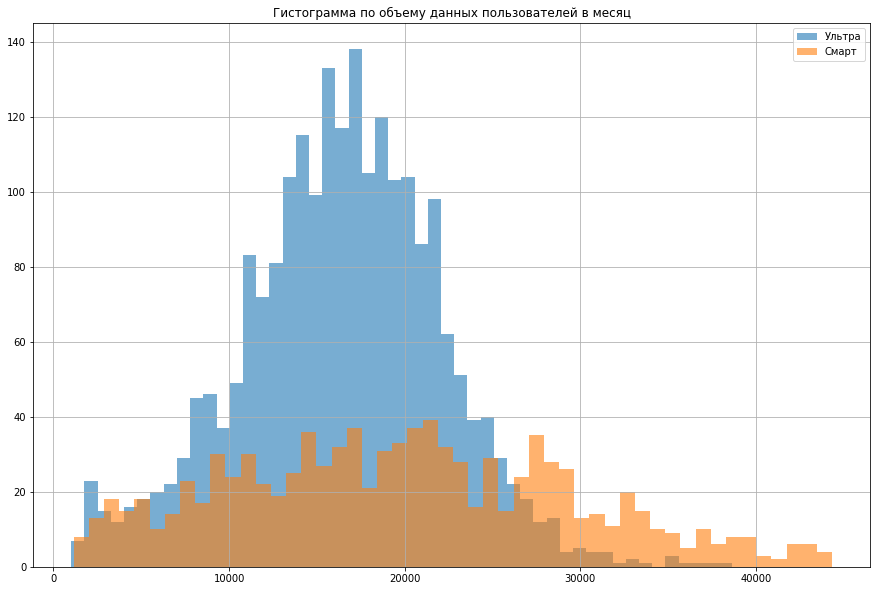

In [90]:
total_mb_smart.hist(bins=50, alpha = 0.6)
total_mb_ultra.hist(bins=50, alpha = 0.6, figsize=(15, 10))
plt.title('Гистограмма по объему данных пользователей в месяц')
plt.legend(["Ультра", "Смарт"]);

Для проверки вывожу на экран диаграммы по продолжительности разговоров без выбросов.<br>
Диаграмма принимает вид, характерный для нормального распределения.

<a id='conclusion3'></a>
### Вывод 3

1. Пользователи тарифа Ультра тратят больше минут, сообщений и интернет трафика, чем пользователи тарифа Смарт.
2. В данных по обоим тарифам есть выбросы в околонулевой зоне. Это может быть связано с тем, что пользователи активно используют другие тарифные опции (например не пользуются звонками, но активно отправляют смс сообщения).
3. Данные пользователей тарифа Смарт распределены более линейно.

<a id='step4'></a>
## Шаг 4. Проверка гипотез
<a href='#step41'>Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается</a><br>
<a href='#step42'>Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a><br>
<a href='#conclusion4'>Вывод 4</a><br>

<a id='stepX'></a>
### Удаление выбросов

In [91]:
total_proceeds_smart = total.query('tariff == "smart"')['proceeds']
total_proceeds_ultra = total.query('tariff == "ultra"')['proceeds']

Формирую массивы данных о выручке в зависимости от тарифа.

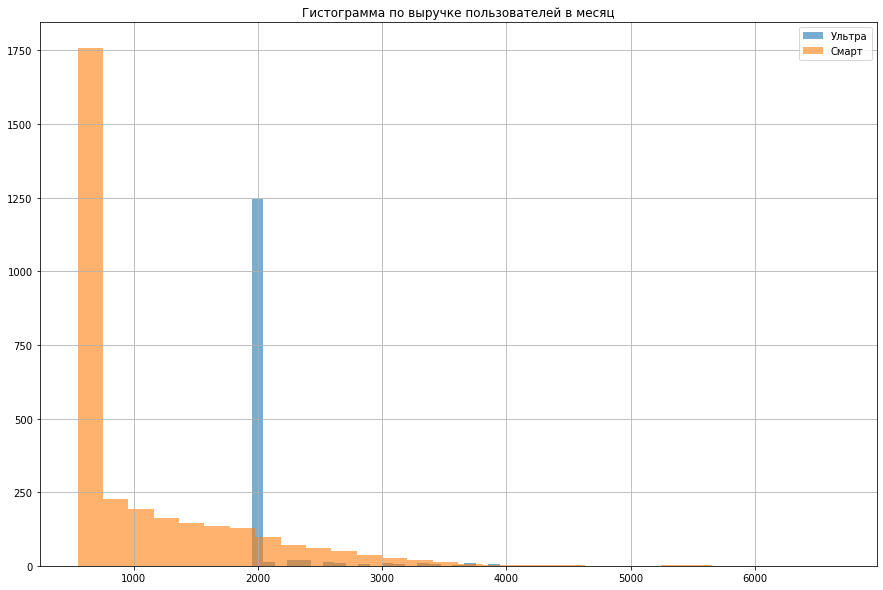

In [92]:
total_proceeds_ultra.hist(bins=30, alpha = 0.6)
total_proceeds_smart.hist(bins=30, alpha = 0.6, figsize=(15, 10))
plt.title('Гистограмма по выручке пользователей в месяц')
plt.legend(["Ультра", "Смарт"]);

На гистограмме видны выбросы в 500 рублёвой зоне для Смарт и в 2000 зоне для Ультра.<br>
Эти выбросы объясняются тем, что такие же значения имеют ежемесячные платы по тарифам, соответственно пользователи, которые укладываются в лимиты по услугам платят в рамках этих значений.


In [93]:
city_proceeds_moscow = total.query('city == "Москва"')['proceeds']
city_proceeds_cities = total.query('city != "Москва"')['proceeds']

Формирую массивы данных о выручке в зависимости от города абонента.

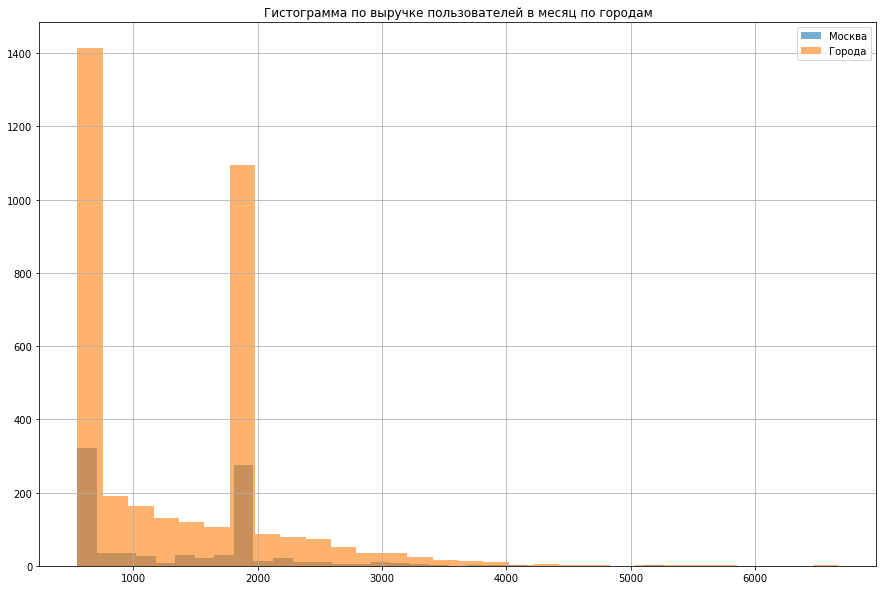

In [94]:
city_proceeds_moscow.hist(bins=30, alpha = 0.6)
city_proceeds_cities.hist(bins=30, alpha = 0.6, figsize=(15, 10))
plt.title('Гистограмма по выручке пользователей в месяц по городам')
plt.legend(["Москва", "Города"]);

На гистограмме также видны аналогиные выбросы в 500 и 2000 рублёвой зоне.<br>
Эти выбросы можно объяснить аналогично.


In [95]:
total_proceeds_smart_clear = total.query('tariff == "smart" & proceeds != 550')['proceeds']
#отсекаю значения, равные платежам по тарифу
total_proceeds_ultra_clear = total.query('tariff == "ultra" & proceeds!= 1950')['proceeds']

Формирую массивы данных о выручке в зависимости от тарифа.

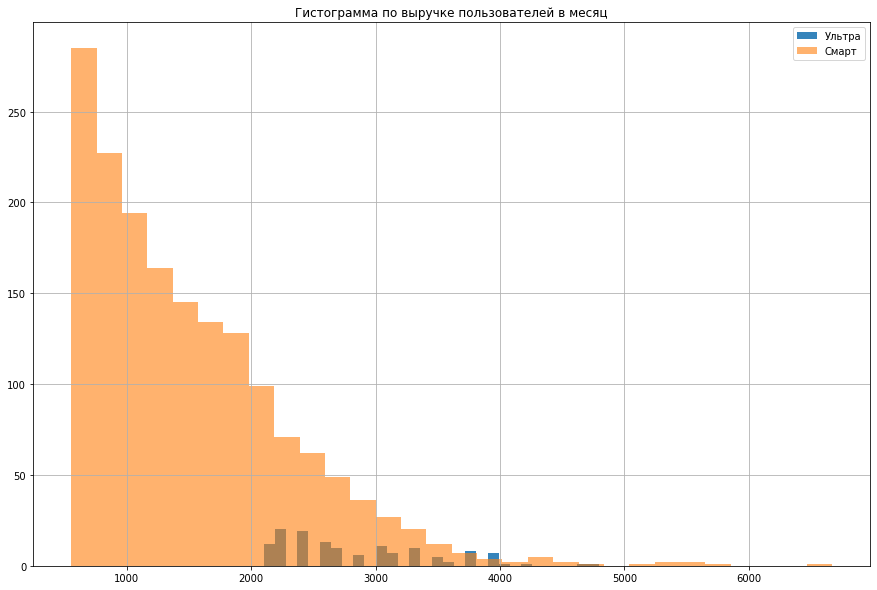

In [96]:
total_proceeds_ultra_clear.hist(bins=30, alpha = 0.9)
total_proceeds_smart_clear.hist(bins=30, alpha = 0.6, figsize=(15, 10))
plt.title('Гистограмма по выручке пользователей в месяц')
plt.legend(["Ультра", "Смарт"]);

Гистограмма принимает вид массива данных без выбросов.
Для тарифа Смарт распределение Пуассона, а для тарифа Ультра более похоже на нормальное распределение.


In [97]:
city_proceeds_moscow_clear = total.query('city == "Москва" & proceeds != 550 & proceeds!= 1950')['proceeds']
city_proceeds_cities_clear = total.query('city != "Москва" & proceeds != 550 & proceeds!= 1950')['proceeds']

Формирую массивы данных о выручке в зависимости от города абонента.

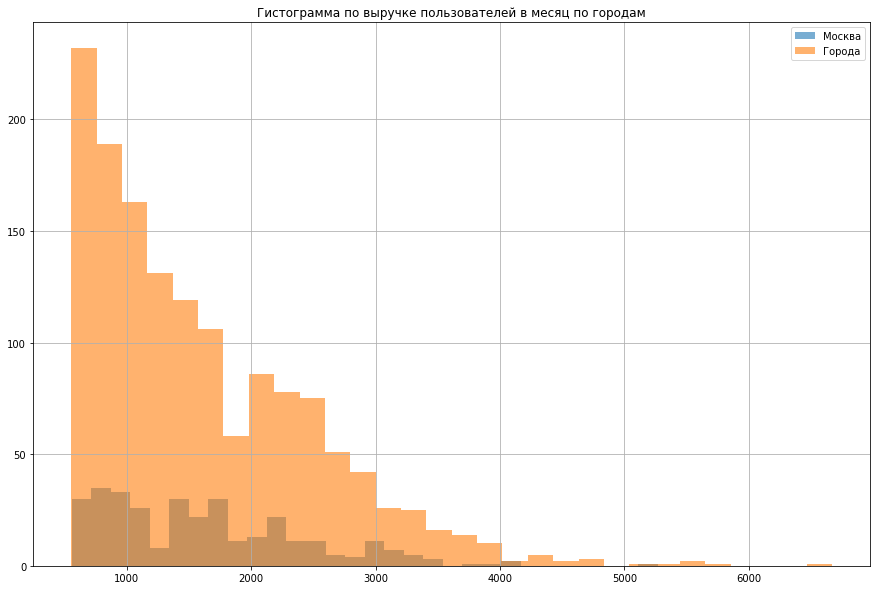

In [98]:
city_proceeds_moscow_clear.hist(bins=30, alpha = 0.6)
city_proceeds_cities_clear.hist(bins=30, alpha = 0.6, figsize=(15, 10))
plt.title('Гистограмма по выручке пользователей в месяц по городам')
plt.legend(["Москва", "Города"]);

Гистограмма принимает вид массива данных без выбросов.
Для обоих массивов характерно распределение Пуассона.


<a id='step41'></a>
### Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

<font color=grey>Пороговое значение alpha задайте самостоятельно.<br><br>
Поясните:<br>
как вы формулировали нулевую и альтернативную гипотезы;<br>
какой критерий использовали для проверки гипотез и почему.<br></font>

In [99]:
print('Дисперсия для выручки по Смарт: {:.0f}'.format(np.var(total_proceeds_smart)))
print('Дисперсия для выручки по Ультра: {:.0f}'.format(np.var(total_proceeds_ultra)))

Дисперсия для выручки по Смарт: 588373
Дисперсия для выручки по Ультра: 105239


Дисперсия для данных по тарифу Смартвыше, чем для данных по тарифу Ультра, дисперсии не равны.

<strong>Выбор критерия для проверки гипотезы.</strong>
1. Тип данных: количественные, непрерывные;
2. Данные ведут себя как при нормальном распределении;
3. Данные из выборок независимы друг от друга (в каждой выборке представлены разные абоненты);
4. В сравнении участвуют средние показатели из выборки.
<br>

Исходя из этих пунктов выбираю критерий Стьюдента (t-test) 
<br>
Исходя из того, что дисперсии выборок не равны,при расчёте передаю параметр <i>equal_var = False</i>.<br>
Пороговое значение alpha - 5%

Тип данных - количественные, непрерывные.

Формулирую нулевую гипотезу:<br>
Средняя выручка пользователей тарифа Ультра равна средней выручке тарифа Смарт.<br>
<br>
Альтернативная гипотеза:<br>
Средняя выручка пользователей тарифа Ультра отличается от средней выручки тарифа Смарт.<br>
<br>
Для проверки гипотез использовал массивы данных с помесячной выручкой пользователей, отсортированные по тарифу.<br>

In [100]:
alpha = 0.05 #выбираю значение согласно примеру в теоретической части

results = st.ttest_ind(
    total_proceeds_smart, 
    total_proceeds_ultra,
    equal_var = False)#добавил пункт

print('p-значение:{:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:0.000
Отвергаем нулевую гипотезу


Соответственно средняя выручка пользователей тарифа «Ультра» отличается от средней выручки тарифа «Смарт».

In [101]:
alpha = 0.05 #выбираю значение согласно примеру в теоретической части
#далее расчёты для массивов без выбросов
results = st.ttest_ind(
    total_proceeds_smart_clear, 
    total_proceeds_ultra_clear,
    equal_var = False)


print('p-значение:{:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:0.000
Отвергаем нулевую гипотезу


Соответственно значение p после удаления выбросов не изменилось, средняя выручка пользователей тарифа "Ультра" отличается от средней выручки тарифа "Смарт".

<a id='step42'></a>
### Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

<font color=grey>Пороговое значение alpha задайте самостоятельно.<br><br>
Поясните:<br>
как вы формулировали нулевую и альтернативную гипотезы;<br>
какой критерий использовали для проверки гипотез и почему.<br></font>

In [102]:
print('Дисперсия для выручки по Москве: {:.0f}'.format(np.var(city_proceeds_moscow)))
print('Дисперсия для выручки по городам: {:.0f}'.format(np.var(city_proceeds_cities)))

Дисперсия для выручки по Москве: 591225
Дисперсия для выручки по городам: 646325


Рассчитываю дисперсии. Для остальных городов дисперсия выше, чем для массива данных по Москве, дисперсии не равны.<br>

<strong>Выбор критерия для проверки гипотезы.</strong>
1. Тип данных: количественные, непрерывные;
2. Данные ведут себя как при нормальном распределении;
3. Данные из выборок независимы друг от друга (в каждой выборке представлены разные абоненты);
4. В сравнении участвуют средние показатели из выборки.
<br>

Исходя из этих пунктов выбираю критерий Стьюдента (t-test) 
<br>
Исходя из того, что дисперсии выборок не равны,при расчёте передаю параметр <i>equal_var = False</i>.<br>
Пороговое значение alpha - 5%

Формулирую нулевую гипотезу:<br>
Средняя выручка пользователей жителей Москвы равна выручке пользователей других регионов.<br>
<br>
Альтернативная гипотеза:<br>
Средняя выручка пользователей жителей Москвы отличается от выручки пользователей других регионов.<br>
<br>
Для проверки гипотез использовал массивы данных с помесячной выручкой пользователей, отсортированные по городу.<br>

In [103]:
alpha = 0.05 #выбираю значение согласно примеру в теоретической части

results = st.ttest_ind(
    city_proceeds_moscow, 
    city_proceeds_cities,
    equal_var = False)

print('p-значение:{:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:0.771
Не получилось отвергнуть нулевую гипотезу


Соответственно средняя выручка пользователей жителей Москвы равна выручке пользователей других регионов.

In [104]:
alpha = 0.05 #выбираю значение согласно примеру в теоретической части
#далее расчёты для массивов без выбросов
results = st.ttest_ind(
    city_proceeds_moscow_clear, 
    city_proceeds_cities_clear,
    equal_var = False)

print('p-значение:{:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:0.793
Не получилось отвергнуть нулевую гипотезу


Соответственно значение p после удаления выбросов критически не изменилось, средняя выручка пользователей жителей Москвы равна выручке пользователей других регионов.

<a id='conclusion4'></a>
### Вывод 4

Cредняя выручка пользователей тарифа Ультра отличается от средней выручки тарифа Смарт.<br>
Cредняя выручка пользователей жителей Москвы равна выручке пользователей других регионов.<br>
<br>
На данных, очищенных от выбросов результаты не изменились.<br>
<br>
Дисперсия для данных по тарифу Смарт почти в два раза выше, чем для данных по тарифу Ультра.<br>
Для остальных городов дисперсия выше, чем для массива данных по Москве.

<strong>Исходя из того, что данные распределены не нормально, а тип данных количественный, непрерывный и данные независимы (т.к. пользователи используют разные тарифы), а также мы сравниваем всего 2 группы, то необходимо применить критерий Манна-Уитни.</strong>

Формулирую нулевую гипотезу:<br>
Средняя выручка пользователей тарифа Ультра равна средней выручке тарифа Смарт.<br>
<br>
Альтернативная гипотеза:<br>
Средняя выручка пользователей тарифа Ультра отличается от средней выручки тарифа Смарт.<br>
<br>
Для проверки гипотез использовал массивы данных с помесячной выручкой пользователей, отсортированные по тарифу, очищенные от выбросов<br>

In [105]:
# Mann-Whitney U test
from scipy.stats import mannwhitneyu
# compare samples
stat, p = mannwhitneyu(total_proceeds_smart_clear, total_proceeds_ultra_clear)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=21917.500, p=0.000
Different distribution (reject H0)


Нулевая гипотеза отклонена.<br>
Распределения выборки не равны.<br>
Соответственно средняя выручка пользователей тарифа «Ультра» отличается от средней выручки тарифа «Смарт».<br>

Формулирую нулевую гипотезу:<br>
Средняя выручка пользователей жителей Москвы равна выручке пользователей других регионов.<br>
<br>
Альтернативная гипотеза:<br>
Средняя выручка пользователей жителей Москвы отличается от выручки пользователей других регионов.<br>
<br>
Для проверки гипотез использовал массивы данных с помесячной выручкой пользователей, отсортированные по городу, очищенные от выбросов.<br>

In [106]:
# Mann-Whitney U test
from scipy.stats import mannwhitneyu
# compare samples
stat, p = mannwhitneyu(city_proceeds_moscow_clear, city_proceeds_cities_clear)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=229737.500, p=0.407
Same distribution (fail to reject H0)


Не удаётся отклонить нулевую гипотезу.<br>
Распределения выборки равны.<br>
Соответственно средняя выручка пользователей жителей Москвы равна выручке пользователей других регионов.<br>

Таким образом, результаты, полученные по критерию Манна-Уитни на массивах, очищенные от выбросов, всё равно равны результатам по методу Стьюдента на "грязных" данных.

<a id='step5'></a>
## Шаг 5. Общий вывод

В датафреймах представлена следующая информация:<br>
1. 202607 строк с данными о разговорах пользователей;<br>
2. 149396 строк с данными об интернет-сессиях пользователей;<br>
3. 123036 строк с данным о сообщениях пользователей;<br>
4. 2 тарифах;<br>
5. 500 уникальных пользователях.
<br><br>

В таблицах <strong>calls</strong> и <strong>internet</strong> столбцы 'duration' и 'mb_used' были округлены до целого значения в большую сторону, т.к. это задано условиями тарифа.
<br><br>

По типам данных были произведены следующие изменения:<br>
1. В таблице <strong>calls</strong> в столбце call_date с object на date, в столбце duration требуется с float на int;
2. В таблице <strong>internet</strong> в столбце mb_used с float на int, т.к. точность после запятой не требуется, а в столбце session_date с object на date;
3. В таблице <strong>messages</strong> в столбце message_date с object на date;
4. В таблице <strong>users</strong> в столбцах churn_date и reg_date с object на date.
<br><br>

В таблице <strong>internet</strong> удалён столбец <strong>Unnamed: 0</strong>, который не отражён в описании данных, значения дублируются с индексами.
<br><br>
В таблицах <strong>calls</strong> и <strong>internet</strong> были удалены нулевые данные (звонки, сессии), которые составляли <strong>19.6%</strong> и <strong>13.2%</strong> соответстветственно. Природа появления этих данных требует дополнительного анализа.
<br><br>
Пропущенные значения в столбце 'churn_date' (дата прекращения пользования тарифом также были заменены на значение 12), а при расчётах заданий использовалось значение текущего месяца (от 1 до 12).<br>
<br><br>
Также были сформированы таблицы:<br>
с количеством израсходованных минут пользователями по месяцам;<br>
с количеством звонков пользователями по месяцам;<br>
с количеством сообщений пользователями по месяцам;<br>
с объемом израсходованного траффика пользователями по месяцам;<br>
с данными о выручке с каждого пользователя по месяцам.<br>
<br><br>
Выводы по ходу изучения данных:
1. Пользователи тарифа Ультра тратят больше минут, сообщений и интернет трафика, чем пользователи тарифа Смарт.
2. В данных по обоим тарифам есть выбросы в околонулевой зоне. Это может быть связано с тем, что пользователи активно используют другие тарифные опции (например не пользуются звонками, но активно отправляют смс сообщения).
3. Данные пользователей тарифа Смарт распределены более линейно.
<br><br>

Т.к. данные распределены не нормально, тип данных количественный, непрерывный и данные независимы, а также в сравнении всего 2 группы, необходимо применить критерий Манна-Уитни.<br><br>
<strong>Cредняя выручка пользователей тарифа «Ультра» отличается от средней выручки тарифа «Смарт».<br>
Cредняя выручка пользователей жителей Москвы равна выручке пользователей других регионов.<br></strong>
<br>
Дисперсия для данных по тарифу Смарт выше, чем для данных по тарифу Ультра.<br>
Для остальных городов дисперсия выше, чем для массива данных по Москве.

